In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random
import feature_finder_keiko as ff
from datetime import datetime
plt.rcParams["figure.figsize"] = (20,10)
import scipy.stats as st
import os
from Data import Data
import pickle
from netCDF4 import Dataset
import itertools
from collections import Counter
from mpl_toolkits.basemap import Basemap

In [4]:
d = Data("../../../nc/GPCC_half.nc",'precip',missing_value=-9.96921e+36)

KeyError: 'air'

In [12]:
data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [14]:
data.shape

(1512, 13129)

In [10]:
lat

array([ 38.75,  38.25,  37.75,  37.25,  36.75,  36.25,  35.75,  35.25,
        34.75,  34.25,  33.75,  33.25,  32.75,  32.25,  31.75,  31.25,
        30.75,  30.25,  29.75,  29.25,  28.75,  28.25,  27.75,  27.25,
        26.75,  26.25,  25.75,  25.25,  24.75,  24.25,  23.75,  23.25,
        22.75,  22.25,  21.75,  21.25,  20.75,  20.25,  19.75,  19.25,
        18.75,  18.25,  17.75,  17.25,  16.75,  16.25,  15.75,  15.25,
        14.75,  14.25,  13.75,  13.25,  12.75,  12.25,  11.75,  11.25,
        10.75,  10.25,   9.75,   9.25,   8.75,   8.25,   7.75,   7.25,
         6.75,   6.25,   5.75,   5.25,   4.75,   4.25,   3.75,   3.25,
         2.75,   2.25,   1.75,   1.25,   0.75,   0.25,  -0.25,  -0.75,
        -1.25,  -1.75,  -2.25,  -2.75,  -3.25,  -3.75,  -4.25,  -4.75,
        -5.25,  -5.75,  -6.25,  -6.75,  -7.25,  -7.75,  -8.25,  -8.75,
        -9.25,  -9.75, -10.25, -10.75, -11.25, -11.75, -12.25, -12.75,
       -13.25, -13.75, -14.25, -14.75, -15.25, -15.75, -16.25, -16.75,
      

In [9]:
lat[0]

38.75

In [6]:
lat

array([ 38.75,  38.25,  37.75,  37.25,  36.75,  36.25,  35.75,  35.25,
        34.75,  34.25,  33.75,  33.25,  32.75,  32.25,  31.75,  31.25,
        30.75,  30.25,  29.75,  29.25,  28.75,  28.25,  27.75,  27.25,
        26.75,  26.25,  25.75,  25.25,  24.75,  24.25,  23.75,  23.25,
        22.75,  22.25,  21.75,  21.25,  20.75,  20.25,  19.75,  19.25,
        18.75,  18.25,  17.75,  17.25,  16.75,  16.25,  15.75,  15.25,
        14.75,  14.25,  13.75,  13.25,  12.75,  12.25,  11.75,  11.25,
        10.75,  10.25,   9.75,   9.25,   8.75,   8.25,   7.75,   7.25,
         6.75,   6.25,   5.75,   5.25,   4.75,   4.25,   3.75,   3.25,
         2.75,   2.25,   1.75,   1.25,   0.75,   0.25,  -0.25,  -0.75,
        -1.25,  -1.75,  -2.25,  -2.75,  -3.25,  -3.75,  -4.25,  -4.75,
        -5.25,  -5.75,  -6.25,  -6.75,  -7.25,  -7.75,  -8.25,  -8.75,
        -9.25,  -9.75, -10.25, -10.75, -11.25, -11.75, -12.25, -12.75,
       -13.25, -13.75, -14.25, -14.75, -15.25, -15.75, -16.25, -16.75,
      

In [21]:
lat

array([ 39.75,  39.25,  38.75,  38.25,  37.75,  37.25,  36.75,  36.25,
        35.75,  35.25,  34.75,  34.25,  33.75,  33.25,  32.75,  32.25,
        31.75,  31.25,  30.75,  30.25,  29.75,  29.25,  28.75,  28.25,
        27.75,  27.25,  26.75,  26.25,  25.75,  25.25,  24.75,  24.25,
        23.75,  23.25,  22.75,  22.25,  21.75,  21.25,  20.75,  20.25,
        19.75,  19.25,  18.75,  18.25,  17.75,  17.25,  16.75,  16.25,
        15.75,  15.25,  14.75,  14.25,  13.75,  13.25,  12.75,  12.25,
        11.75,  11.25,  10.75,  10.25,   9.75,   9.25,   8.75,   8.25,
         7.75,   7.25,   6.75,   6.25,   5.75,   5.25,   4.75,   4.25,
         3.75,   3.25,   2.75,   2.25,   1.75,   1.25,   0.75,   0.25,
        -0.25,  -0.75,  -1.25,  -1.75,  -2.25,  -2.75,  -3.25,  -3.75,
        -4.25,  -4.75,  -5.25,  -5.75,  -6.25,  -6.75,  -7.25,  -7.75,
        -8.25,  -8.75,  -9.25,  -9.75, -10.25, -10.75, -11.25, -11.75,
       -12.25, -12.75, -13.25, -13.75, -14.25, -14.75, -15.25, -15.75,
      

In [32]:
d = Data("../../../nc/GPCC_africa_2.5.nc",'precip',missing_value=-9.96921e+36)

In [33]:
data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [34]:
336.25 - 360

-23.75

In [30]:
lon

array([336.25, 338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75,
       356.25, 358.75,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
        16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,  33.75,
        36.25,  38.75,  41.25,  43.75,  46.25,  48.75,  51.25,  53.75,
        56.25,  58.75], dtype=float32)

In [31]:
lat

array([ 38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,  21.25,
        18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75,
       -21.25, -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75],
      dtype=float32)

In [14]:
lon_list

[336.25,
 336.25,
 341.25,
 341.25,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 3.75,
 3.75,
 3.75,

In [34]:
e = Dataset("../../../nc/GPCC_africa_2.5.nc")

In [37]:
e.variables['lon'][:]

array([336.25, 338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75,
       356.25, 358.75,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
        16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,  33.75,
        36.25,  38.75,  41.25,  43.75,  46.25,  48.75,  51.25,  53.75,
        56.25,  58.75], dtype=float32)

In [38]:
e.variables['lat'][:]

array([ 38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,  21.25,
        18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75,
       -21.25, -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75],
      dtype=float32)

In [4]:
d = Dataset("../../../nc/precipitation.nc")

In [5]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Thu May  2 12:34:08 2019: ncrcat -O -n 1,3,1 /httpd/psd/tmp/ot.X179.234.183.17.121.12.34.8.nc.001.nc /Public/www/X179.234.183.17.121.12.34.8.nc
Thu May  2 12:34:08 2019: ncks -a -O -d lat,-40.750000,40.750000 -d lon,334.750000,60.750000 -d time,660,1500 /Datasets/gpcc/full_v2018/precip.mon.total.2.5x2.5.v2018.nc /httpd/psd/tmp/ot.X179.234.183.17.121.12.34.8.nc.001.nc
Created 09/2018  based on V2018 data obtained via ftp
    title: GPCC Full Data Reanalysis Version 2018 2.5x2.5 Monthly Total
    Conventions: CF 1.0
    References: https://www.esrl.noaa.gov/psd/data/gridded/data.gpcc.html
    Original_Source: http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm
 is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html
    Reference: Users of the data sets are kindly requested to give feed back and to refer to GPCC publications on this webpage: http://www.

In [6]:
d.variables['lon'][:]

array([336.25, 338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75,
       356.25, 358.75,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
        16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,  33.75,
        36.25,  38.75,  41.25,  43.75,  46.25,  48.75,  51.25,  53.75,
        56.25,  58.75], dtype=float32)

In [7]:
d.variables['lat'][:]

array([ 38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,  21.25,
        18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75,
       -21.25, -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75],
      dtype=float32)

In [11]:
336.25-360

-23.75

In [5]:
c = Dataset('../../../nc/air_monthly_mean_africa_half.nc')

In [6]:
c

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions: CF-1.0
    Source: http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.GHCN_CAMS/.gridded/.deg0p5/
    version: 3.01
    history: Mon Jul 19 03:08:21 2021: ncrcat -O -n 1,3,1 /httpd/psd/tmp/ot.X188.229.17.98.199.3.8.16.nc.001.nc /Public/www/X188.229.17.98.199.3.8.16.nc
Mon Jul 19 03:08:17 2021: ncks -a -O -d lat,-38.750000,38.750000 -d lon,336.250000,58.750000 -d time,0,875 /Datasets/ghcncams/air.mon.mean.nc /httpd/psd/tmp/ot.X188.229.17.98.199.3.8.16.nc.001.nc
created 8/2012 by CAS NOAA/ESRL PSDupdated to include major version change Oct 14, 2015. Antarctica temperature is no longer in the dataset
    dataset_title: Climate Prediction Center (CPC) Global Land Surface Air Temperature Analysis
    References: https://www.psl.noaa.gov/data/gridded/data.ghcncams.html
    NCO: netCDF Operators version 4.8.1 (Homepage = http:/

In [19]:
c.variables['lon'][:]

array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,
        21.25,  23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,
        41.25,  43.75,  46.25,  48.75,  51.25,  53.75,  56.25,  58.75,
        61.25,  63.75,  66.25,  68.75,  71.25,  73.75,  76.25,  78.75,
        81.25,  83.75,  86.25,  88.75,  91.25,  93.75,  96.25,  98.75,
       101.25, 103.75, 106.25, 108.75, 111.25, 113.75, 116.25, 118.75,
       121.25, 123.75, 126.25, 128.75, 131.25, 133.75, 136.25, 138.75,
       141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25, 158.75,
       161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75,
       201.25, 203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75,
       221.25, 223.75, 226.25, 228.75, 231.25, 233.75, 236.25, 238.75,
       241.25, 243.75, 246.25, 248.75, 251.25, 253.75, 256.25, 258.75,
       261.25, 263.75, 266.25, 268.75, 271.25, 273.75, 276.25, 278.75,
      

In [20]:
c.variables['lat'][:]

array([ 88.75,  86.25,  83.75,  81.25,  78.75,  76.25,  73.75,  71.25,
        68.75,  66.25,  63.75,  61.25,  58.75,  56.25,  53.75,  51.25,
        48.75,  46.25,  43.75,  41.25,  38.75,  36.25,  33.75,  31.25,
        28.75,  26.25,  23.75,  21.25,  18.75,  16.25,  13.75,  11.25,
         8.75,   6.25,   3.75,   1.25,  -1.25,  -3.75,  -6.25,  -8.75,
       -11.25, -13.75, -16.25, -18.75, -21.25, -23.75, -26.25, -28.75,
       -31.25, -33.75, -36.25, -38.75, -41.25, -43.75, -46.25, -48.75,
       -51.25, -53.75, -56.25, -58.75, -61.25, -63.75, -66.25, -68.75,
       -71.25, -73.75, -76.25, -78.75, -81.25, -83.75, -86.25, -88.75],
      dtype=float32)

In [5]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
class_dic = load_obj("class_dic")

In [6]:
def neighbour_vote_class(dic,lat,lon):
    shift = [[-0.25,0.25],[-0.25,0.25]]
    shift_list = []
    for element in itertools.product(*shift):
        shift_list.append(element)
    #shift_list.remove((0,0))
    result = []
    for x,y in shift_list:
        if lon > 180: lon -= 360
        if (lat + y, lon + x) in class_dic.keys():
            result.append(class_dic[(lat + y, lon + x)])   
    return(np.array(result))

In [19]:
class_dic

{(-89.75, -179.75): 'EF',
 (-89.75, -179.25): 'EF',
 (-89.75, -178.75): 'EF',
 (-89.75, -178.25): 'EF',
 (-89.75, -177.75): 'EF',
 (-89.75, -177.25): 'EF',
 (-89.75, -176.75): 'EF',
 (-89.75, -176.25): 'EF',
 (-89.75, -175.75): 'EF',
 (-89.75, -175.25): 'EF',
 (-89.75, -174.75): 'EF',
 (-89.75, -174.25): 'EF',
 (-89.75, -173.75): 'EF',
 (-89.75, -173.25): 'EF',
 (-89.75, -172.75): 'EF',
 (-89.75, -172.25): 'EF',
 (-89.75, -171.75): 'EF',
 (-89.75, -171.25): 'EF',
 (-89.75, -170.75): 'EF',
 (-89.75, -170.25): 'EF',
 (-89.75, -169.75): 'EF',
 (-89.75, -169.25): 'EF',
 (-89.75, -168.75): 'EF',
 (-89.75, -168.25): 'EF',
 (-89.75, -167.75): 'EF',
 (-89.75, -167.25): 'EF',
 (-89.75, -166.75): 'EF',
 (-89.75, -166.25): 'EF',
 (-89.75, -165.75): 'EF',
 (-89.75, -165.25): 'EF',
 (-89.75, -164.75): 'EF',
 (-89.75, -164.25): 'EF',
 (-89.75, -163.75): 'EF',
 (-89.75, -163.25): 'EF',
 (-89.75, -162.75): 'EF',
 (-89.75, -162.25): 'EF',
 (-89.75, -161.75): 'EF',
 (-89.75, -161.25): 'EF',
 (-89.75, -1

In [9]:
d = Data("../../../nc/GPCC_africa_2.5.nc",'precip',missing_value=-9.96921e+36)

data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [211]:
class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        r = neighbour_vote_class(class_dic,lat,lon) 
        if r.size == 0:
            class_list.append('NAN')
        else:
            most_common,num_most_common = Counter(r).most_common(1)[0]
            class_list.append(most_common)

In [7]:
class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        class_list.append(np.nan)

In [213]:
np.save("Africa_class_list.npy",class_list)

In [10]:
coordinates = list(zip(lat_list,lon_list))

In [21]:
coordinates[9]

(21.25, 343.75)

In [22]:
343.75 - 360

-16.25

In [20]:
np.where(np.array(class_list) == 'BWh')[0]

array([  9,  10,  11,  14,  15,  16,  17,  18,  19,  26,  27,  28,  29,
        30,  31,  41,  42,  43,  44,  45,  46,  56,  57,  58,  59,  60,
        61,  71,  72,  73,  74,  75,  76,  77,  86,  87,  88,  89,  90,
        91,  92, 101, 102, 103, 104, 105, 106, 107, 114, 115, 116, 117,
       118, 119, 120, 121, 127, 128, 129, 130, 131, 132, 133, 134, 143,
       144, 145, 146, 147, 148, 149, 150, 162, 163, 164, 165, 166, 167,
       168, 169, 184, 185, 186, 187, 188, 189, 190, 191, 210, 211, 212,
       213, 214, 215, 216, 217, 231, 232, 238, 239, 240, 241, 242, 243,
       244, 259, 260, 261, 268, 269, 270, 271, 272, 273, 274, 289, 290,
       291, 297, 298, 299, 300, 301, 302, 303, 304, 327, 328, 329, 330,
       331, 332, 333, 334, 356, 357, 358, 359, 360, 361, 362, 363, 386,
       387, 388, 389, 390, 391, 392, 393, 415, 417, 418, 419, 420, 421,
       422, 444, 445, 447, 448, 449, 469, 470, 471, 472, 475, 492, 493,
       494, 495, 496, 497, 498, 500, 514, 515, 516, 517, 518, 51

In [197]:
Idx = np.where(np.array(class_list) != 'nan')[0]

In [198]:
lon_list = np.array(lon_list)[Idx]
lat_list = np.array(lat_list)[Idx]
class_list = np.array(class_list)[Idx]

In [199]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

In [200]:
class_list_set = list(set(class_list))
class_list = np.array(class_list)

In [201]:
class_list_num = np.zeros(len(class_list_set))

In [209]:
class_list_set

['Dsb',
 'Af',
 'BWh',
 'Aw',
 'Csb',
 'BWk',
 'As',
 'Cfb',
 'Cfa',
 'Dsa',
 'Am',
 'Cwb',
 'BSk',
 'Cwa',
 'Csa',
 'BSh']

In [202]:
for j in range(len(class_list_set)):
    Idx = np.where(class_list == class_list_set[j])
    class_list[Idx] = j
    class_list_num[j] = j

In [203]:
df_sst["pc"] = np.array(class_list)

In [129]:
#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-23.75,59,2.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


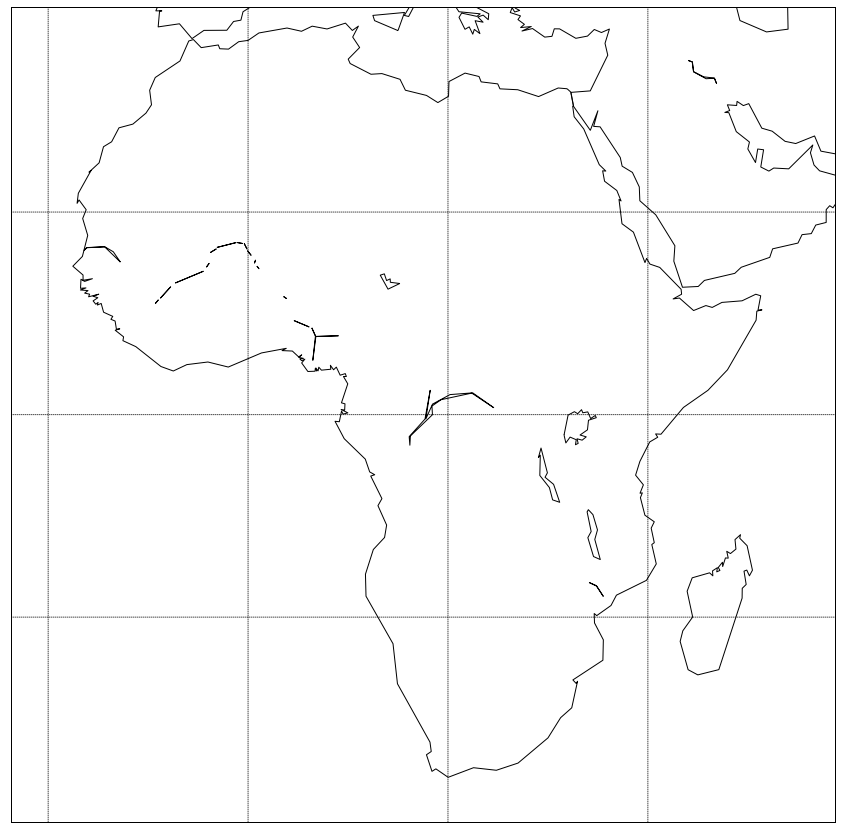

In [132]:
lon  = lon1
m=Basemap(projection='mill',lat_ts=0,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
#cs = m.contourf(x,y,deg,20)
#xx, yy = meshgrid(lon1_sst, lat_sst)
cs = m.pcolormesh(lon2, lat2, deg, cmap=plt.cm.Spectral_r)
#plt.title(' EOF {}'.format(pc), fontsize = 20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("ET EOF {}.png".format(pc))

In [205]:
df_list = []
for j in range(len(class_list_set)):
    df_list.append(pd.DataFrame(columns=df_sst.columns))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


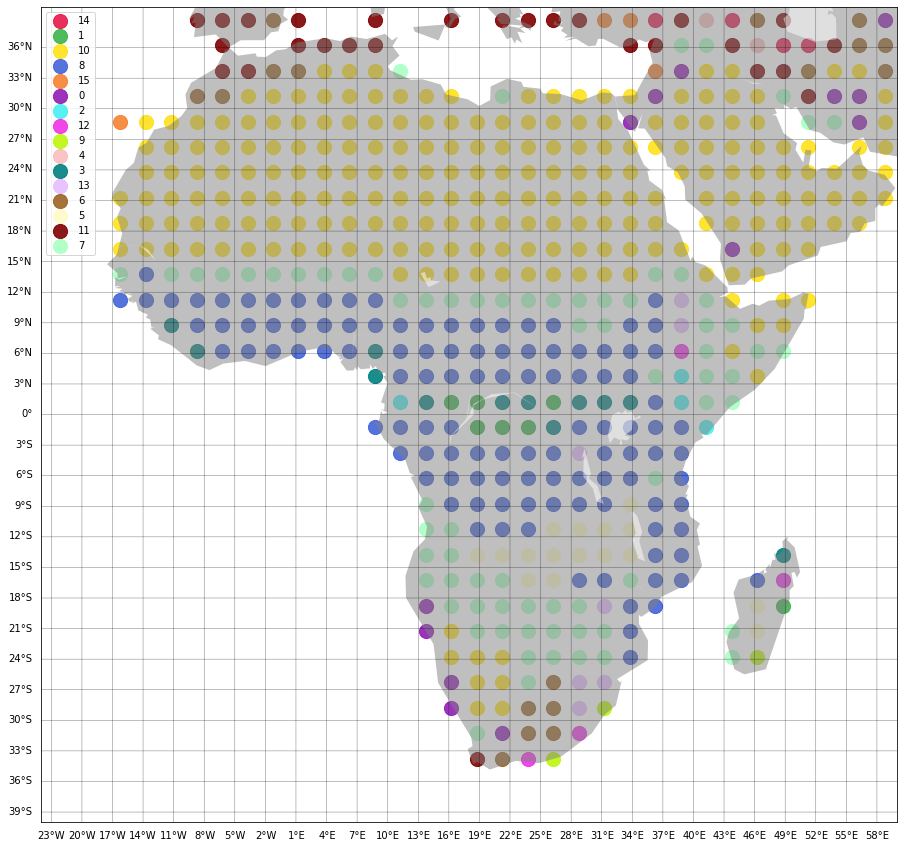

In [206]:
fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
'#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
'#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
#colors = pf.random_color(n_components_sst)

i = 0
for j in range(len(class_list_set)):
    Idx = np.where(class_list == str(j))[0]
    df_list[i] = df_sst.iloc[Idx,:]
    df_list[i]["values"] = j

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=200, label = i, c = colors[i])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, set(class_list))
    i+=1

    
#plt.legend()
#plt.savefig("Climate_Classes.png")
plt.show()


/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


NameError: name 'ax' is not defined

In [135]:
class_list

array(['0', '0', '0', '0', '0', '0', '5', '0', '0', '3', '3', '3', '16',
       '4', '3', '3', '3', '3', '3', '3', '4', '4', '0', '0', '0', '0',
       '3', '3', '3', '3', '3', '3', '16', '4', '11', '0', '0', '15', '0',
       '0', '13', '3', '3', '3', '3', '3', '3', '16', '4', '4', '11', '0',
       '15', '15', '15', '13', '3', '3', '3', '3', '3', '3', '16', '4',
       '4', '4', '0', '0', '15', '0', '15', '3', '3', '3', '3', '3', '3',
       '3', '16', '4', '4', '4', '0', '13', '0', '13', '3', '3', '3', '3',
       '3', '3', '3', '16', '4', '4', '4', '0', '15', '15', '13', '3',
       '3', '3', '3', '3', '3', '3', '16', '4', '4', '4', '0', '15', '3',
       '3', '3', '3', '3', '3', '3', '3', '16', '4', '4', '4', '15', '3',
       '3', '3', '3', '3', '3', '3', '3', '16', '4', '4', '4', '0', '0',
       '15', '15', '3', '3', '3', '3', '3', '3', '3', '3', '16', '4', '4',
       '11', '11', '0', '4', '0', '0', '0', '16', '3', '3', '3', '3', '3',
       '3', '3', '3', '16', '4', '4', '4',